In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

DATA PREPROCESSING

In [158]:
#Import the csv file
data= pd.read_csv('kc_house_data.csv', header = 'infer')

In [159]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [161]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [162]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [163]:
# Count the missing values per column.
(data.isnull()).sum(axis=0)
#we see that there's no nan values in our dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

DATA VISUALIZATION

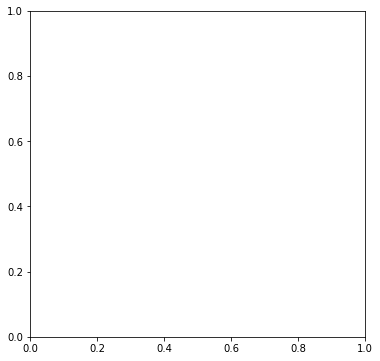

In [164]:
fig,ax= plt.subplots(figsize=(6,6))

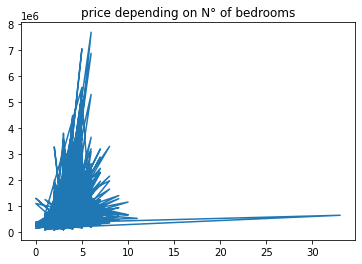

In [165]:
plt.plot(data['bedrooms'], data['price'])
plt.title('price depending on N° of bedrooms');

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

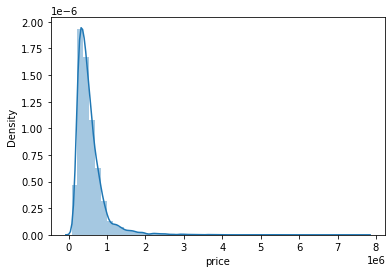

In [166]:
sns.distplot(data['price'])


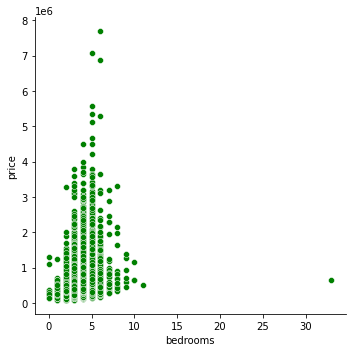

In [167]:
sns.relplot(x="bedrooms", y="price", data=data, color='green');

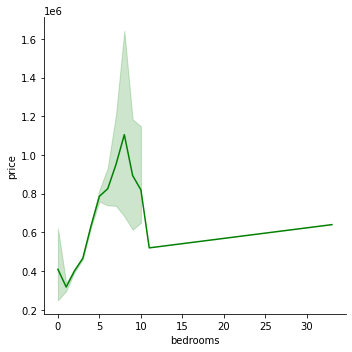

In [168]:
sns.relplot(x="bedrooms", y="price", data=data,kind='line', color='green');

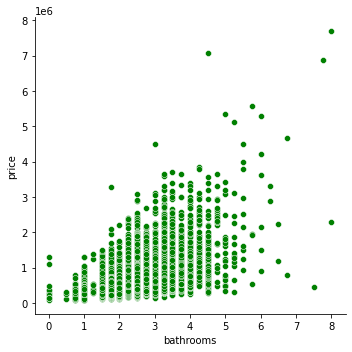

In [169]:
sns.relplot(x="bathrooms", y="price", data=data, color='green');

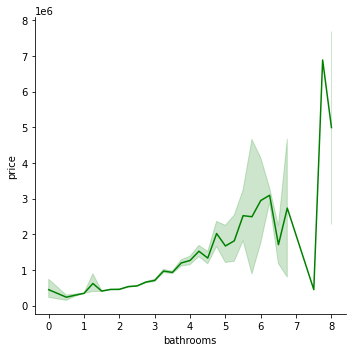

In [170]:
sns.relplot(x="bathrooms", y="price", data=data,kind='line', color='green');

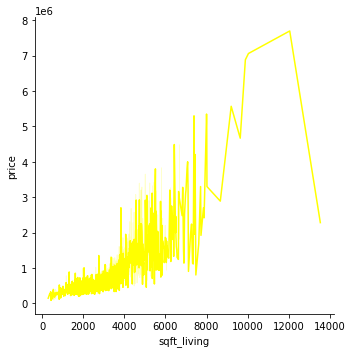

In [171]:
sns.relplot(x="sqft_living", y="price", data=data,kind='line', color='yellow');

In [172]:
cor = data.corr()
round(cor,2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


[Text(0.5, 1.0, 'Correlation matrix of our data\n')]

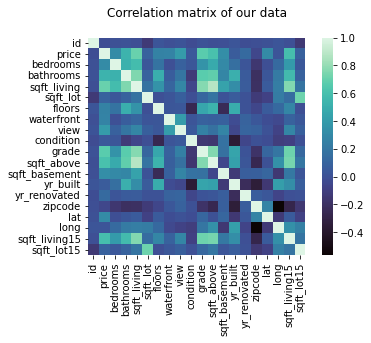

In [173]:
hm=sns.heatmap(cor,cmap='mako',square=True,linecolor='w');
hm.set( title = "Correlation matrix of our data\n")

In [174]:
#we noticed that some variables are useless in our case, so,let's drop them
data.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date'], inplace = True)


[Text(0.5, 1.0, 'Correlation matrix of our data\n')]

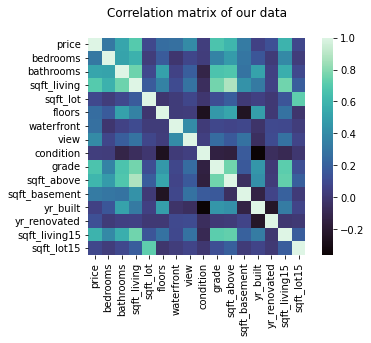

In [175]:
hm=sns.heatmap(data.corr(),cmap='mako',square=True,linecolor='w');
hm.set( title = "Correlation matrix of our data\n")

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
We can see that the correlation is positively strong when it comes to price and (sqft_living,Grade,sqft_above, sqft_living15..),sqft_above,floors,condition...)we also notice that there's no a strong negative corelation between Price and other vars

MODELING

In [176]:
X = data['sqft_living'].values.reshape(-1,1)
Y = data['price'].values.reshape(-1,1)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [178]:
X_train

array([[1810],
       [1600],
       [1720],
       ...,
       [2120],
       [ 380],
       [3130]], dtype=int64)

In [179]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [180]:
print(regressor.intercept_,regressor.coef_)#check the parameters a and b

[-39814.16265844] [[278.44089985]]


In [181]:
#make predictions
y_pred = regressor.predict(X_test)

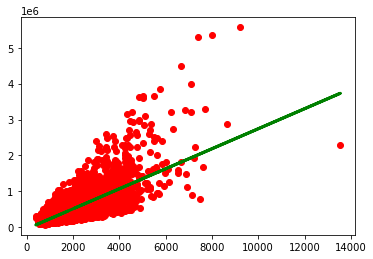

In [182]:
# Plot outputs
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="green", linewidth=3)



In [183]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

         Actual     Predicted
0      365000.0  5.365585e+05
1      865000.0  7.676644e+05
2     1038000.0  1.009908e+06
3     1490000.0  1.229876e+06
4      711000.0  6.702101e+05
...         ...           ...
5399   650000.0  7.453892e+05
5400   705000.0  3.667096e+05
5401   272500.0  5.365585e+05
5402  2250000.0  1.285565e+06
5403   330000.0  4.391042e+05

[5404 rows x 2 columns]


we can see that the predicted values are a way far from the actual ones, the simple linear regression doesn't suit our problem well

In [184]:
#measuring the performance using the mse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean squared error: 75320835437.85
Root mean squared error: 274446.42


Multiple linear regression

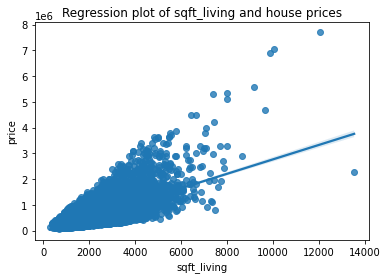

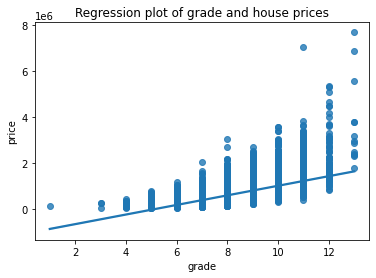

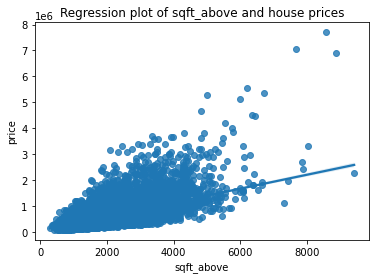

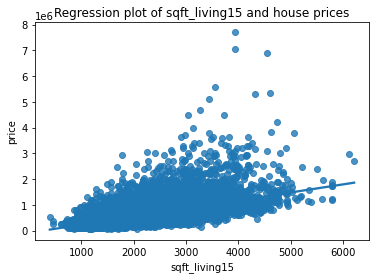

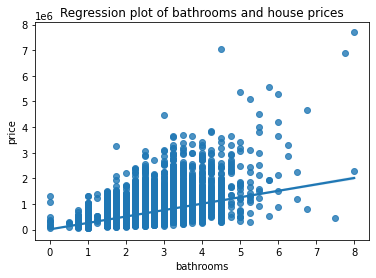

In [185]:
#we are importing Seaborn, creating a list of the variables we want to plot, and looping through that list to plot each independent variable with our dependent variable.
variables = ['sqft_living', 'grade', 'sqft_above','sqft_living15','bathrooms']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='price', data=data).set(title=f'Regression plot of {var} and house prices');

In [186]:
y = data['price'].values.reshape(-1,1)
x = data[['sqft_living', 'grade','sqft_above', 'sqft_living15','bathrooms']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)



In [187]:
regressor_mul = LinearRegression()
regressor_mul.fit(X_train2, y_train2)

LinearRegression()

In [188]:
print(regressor_mul.intercept_, regressor_mul.coef_)
#Those 5 values are the coefficients for each of our features in the same order as we have them in our X data. To see a list with their names, we can use the dataframe columns attribute:

[-632600.00254219] [[ 2.44972877e+02  1.08349319e+05 -8.13456415e+01  2.28602212e+01
  -3.17052494e+04]]


In [189]:
feature_names = x.columns
model_coefficients = regressor_mul.coef_
coefficients_df = pd.DataFrame(data = model_coefficients.reshape(5,1), index = feature_names, columns = ['Coefficient value'])
print(coefficients_df)

               Coefficient value
sqft_living           244.972877
grade              108349.318918
sqft_above            -81.345641
sqft_living15          22.860221
bathrooms          -31705.249377


In [190]:
#MAKING PRED
y_pred2 = regressor_mul.predict(X_test2)

In [191]:
results = pd.DataFrame({'Actual': y_test2.squeeze(), 'Predicted': y_pred2.squeeze()})
print(results)

         Actual     Predicted
0      365000.0  5.562020e+05
1      865000.0  7.548163e+05
2     1038000.0  1.181665e+06
3     1490000.0  1.395348e+06
4      711000.0  7.319657e+05
...         ...           ...
4318   338000.0  3.055278e+05
4319   673000.0  6.594483e+05
4320   285000.0  6.088419e+05
4321   605000.0  5.937351e+05
4322   356500.0  6.310038e+05

[4323 rows x 2 columns]


In [192]:
#evaluating
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse)
print(f'Mean squared error: {mse2:.2f}')
print(f'Root mean squared error: {rmse2:.2f}')

Mean squared error: 68325878138.50
Root mean squared error: 274446.42


In [193]:
#COMAPARING SIMPLE WITH MULTIPLE LINREG
diff=mse2-mse
diff

-6994957299.349335

WE NOTICE THAT THE NEW ERROR IS VERY SMALL COMPARING TO WHAT WE HAD WHILE USING SIMPLE LINREG
which means that in our case, the proce variable is affected by not only one variable but many, if we add other variable to our multiple linreg model we'll be finding even a samller error

Polynomial regression 2nd degree

In [213]:
x_poly=data['sqft_living'].values.reshape(-1,1)
y_poly=data['price'].values.reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_poly)

In [214]:
#polynomial reg model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_poly)

LinearRegression()

In [215]:
y_predicted = poly_reg_model.predict(poly_features)


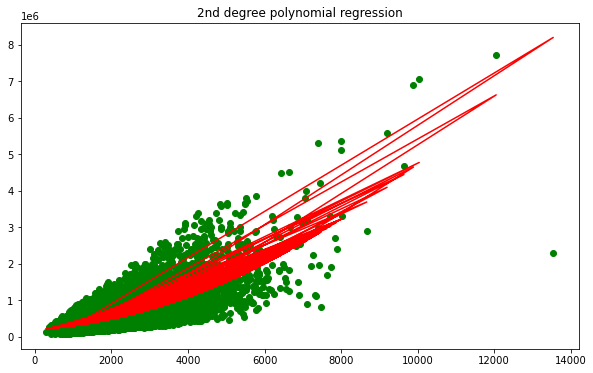

In [216]:
#LET'S VISUALIZE
plt.figure(figsize=(10,6))
plt.title('2nd degree polynomial regression')
plt.scatter(x_poly,y_poly, color='green')
plt.plot(x_poly, y_predicted, color='red')

Polynomial reg third degree

In [208]:
x_poly=data['sqft_living'].values.reshape(-1,1)
y_poly=data['price'].values.reshape(-1,1)
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_poly)

In [209]:
#polynomial reg model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_poly)

LinearRegression()

In [210]:
y_predicted = poly_reg_model.predict(poly_features)

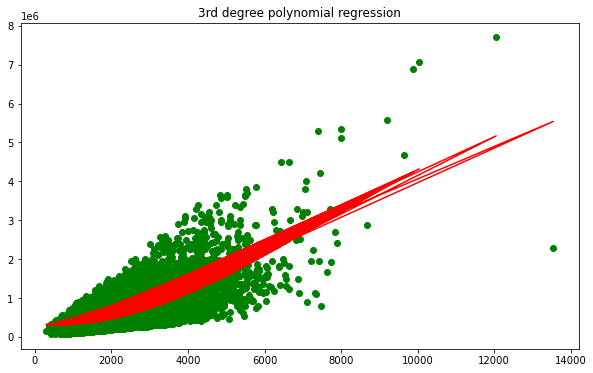

In [212]:
#LET'S VISUALIZE
plt.figure(figsize=(10,6))
plt.title('3rd degree polynomial regression')
plt.scatter(x_poly,y_poly, color='green')
plt.plot(x_poly, y_predicted, color='red')